In [ ]:

import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## **Checking Null Values**

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

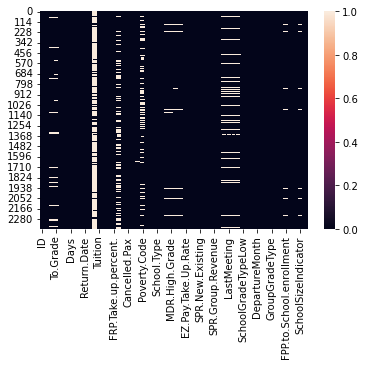

In [ ]:
data=pd.read_csv("64A.csv",parse_dates=['Departure.Date','Return.Date','Deposit.Date','Early.RPL','Latest.RPL','Initial.System.Date','FirstMeeting','LastMeeting'])
print(data.isnull().sum())
sns.heatmap(data.isnull())

In [ ]:
#Remove the special pay column since there are 1919 NA Values
departure_dates=data[['ID','Departure.Date']]
data=data.drop(['Special.Pay'],axis=1)
print("Data rows x columns:",data.shape)

Data rows x columns: (2389, 55)


# **Filling NA Values with Mean, Median or Mode depending on type of data**

In [ ]:
data['From.Grade'].fillna(int(data['From.Grade'].mode()),inplace=True)
data['To.Grade'].fillna(int(data['To.Grade'].mode()),inplace=True)
data['CRM.Segment'].fillna(int(data['CRM.Segment'].mode()),inplace=True)
data['MDR.Low.Grade'].fillna(int(data['MDR.Low.Grade'].mode()),inplace=True)
data['MDR.High.Grade'].fillna(int(data['MDR.High.Grade'].mode()),inplace=True)
data['Total.School.Enrollment'].fillna(int(data['Total.School.Enrollment'].mean()),inplace=True)
data['DifferenceTraveltoFirstMeeting'].fillna(int(data['DifferenceTraveltoFirstMeeting'].mean()),inplace=True)
data['DifferenceTraveltoLastMeeting'].fillna(int(data['DifferenceTraveltoLastMeeting'].mean()),inplace=True)
data['FPP.to.School.enrollment'].fillna(int(data['FPP.to.School.enrollment'].mean()),inplace=True)
data.drop(['Early.RPL','FirstMeeting','LastMeeting','Poverty.Code','Program.Code','Group.State'],axis=1,inplace=True)
data['Difference Latest RPL'] = (data['Departure.Date']-data['Latest.RPL'])/np.timedelta64(1, 'D')
data['Difference Latest RPL'].fillna(int(data['Difference Latest RPL'].mean()),inplace=True)
data['Difference Initial System Date'] = (data['Departure.Date']-data['Initial.System.Date'])/np.timedelta64(1, 'D')
data['Difference Initial System Date'].fillna(int(data['Difference Initial System Date'].mean()),inplace=True)
data['Difference Deposit Date'] = (data['Departure.Date']-data['Deposit.Date'])/np.timedelta64(1, 'D')
data.drop(['Initial.System.Date','Latest.RPL'],axis=1,inplace=True)
data['Income.Level'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','Z','P1','P2','P3','P4','P5'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,13,13,13,13,13,13],inplace=True)
data['Income.Level'].fillna(int(data['Income.Level'].median()),inplace=True)
data['SchoolSizeIndicator'].replace(['S','S-M','M-L','L'],[1,2,3,4],inplace=True)
data['SchoolSizeIndicator'].fillna(int(data['SchoolSizeIndicator'].median()),inplace=True)
data['Travel.Type'].replace(['A','B','T','N'],[1,3,2,1],inplace=True)
data.drop(['Departure.Date','Return.Date'],axis=1,inplace=True)

## **Categorical data to Numerical data, using LabelEncoder**

In [ ]:
le=LabelEncoder()
data.Region=le.fit_transform(data.Region)
data['School.Type']=le.fit_transform(data['School.Type'])
data['SPR.Product.Type']=le.fit_transform(data['SPR.Product.Type'])
data['SPR.New.Existing']=le.fit_transform(data['SPR.New.Existing'])
data['SchoolGradeTypeLow'].replace(['Undefined'],['Middle'],inplace=True)
data['SchoolGradeTypeHigh'].replace(['Undefined'],['Middle'],inplace=True)
data['SchoolGradeTypeLow']=le.fit_transform(data['SchoolGradeTypeLow'])
data['SchoolGradeTypeHigh']=le.fit_transform(data['SchoolGradeTypeHigh'])
data.drop(['SchoolGradeType'],axis=1,inplace=True)
data['DepartureMonth'].replace(['June','May','April','March','February','January'],[6,5,4,3,2,1],inplace=True)
data['GroupGradeTypeLow'].replace(['Undefined'],['Middle'],inplace=True)
data['GroupGradeTypeLow']=le.fit_transform(data['GroupGradeTypeLow'])
data['GroupGradeTypeHigh'].replace(['Undefined'],['Middle'],inplace=True)
data['GroupGradeTypeHigh']=le.fit_transform(data['GroupGradeTypeHigh'])
data['MajorProgramCode']=le.fit_transform(data['MajorProgramCode'])
data.drop(['MDR.Low.Grade','GroupGradeType','Deposit.Date'],axis=1,inplace=True)

In [ ]:
data.info()
#Checking the Data Type
#All values are now non-NULL and numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   int64  
 1   From.Grade                      2389 non-null   float64
 2   To.Grade                        2389 non-null   float64
 3   Is.Non.Annual.                  2389 non-null   int64  
 4   Days                            2389 non-null   int64  
 5   Travel.Type                     2389 non-null   int64  
 6   Tuition                         2389 non-null   int64  
 7   FRP.Active                      2389 non-null   int64  
 8   FRP.Cancelled                   2389 non-null   int64  
 9   FRP.Take.up.percent.            2389 non-null   float64
 10  Cancelled.Pax                   2389 non-null   int64  
 11  Total.Discount.Pax              2389 non-null   int64  
 12  Region                          23

## **Train-Test split (70%-30%)**

In [ ]:
new_data=data.copy()
y=new_data['Retained.in.2012.']
X=new_data.drop(['ID','Retained.in.2012.'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [ ]:
print("----Before Splitting----")
print('X:',X.shape)
print("----After Splitting----")
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

----Before Splitting----
X: (2389, 42)
----After Splitting----
X_train: (1672, 42)
X_test: (717, 42)


## **Decision Tree Classifer**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))


Accuracy: 0.702928870292887


In [ ]:
#Finding the Accuracy using Decision Tree Classifier and changing the parameters
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',splitter='best')
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7126917712691772



## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.6680613668061367


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


We are using normalization to scale down the values to 0-1 range. The reason behind using this command because we got a error while running Logistics Regression('increase the number of iterations'). All the values are in a range 0.1-1000s, so at some point google collab starts giving error in accuracy while running logistics regression

In [ ]:
scaler=MinMaxScaler()
X_train_normalized=scaler.fit_transform(X_train)
X_test_normalized=scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_normalized, y_train)
predictions = model.predict(X_test_normalized)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7921896792189679


## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.6108786610878661


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7921896792189679


## **SVM Classifier**

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.603905160390516


## **Feature Selection**

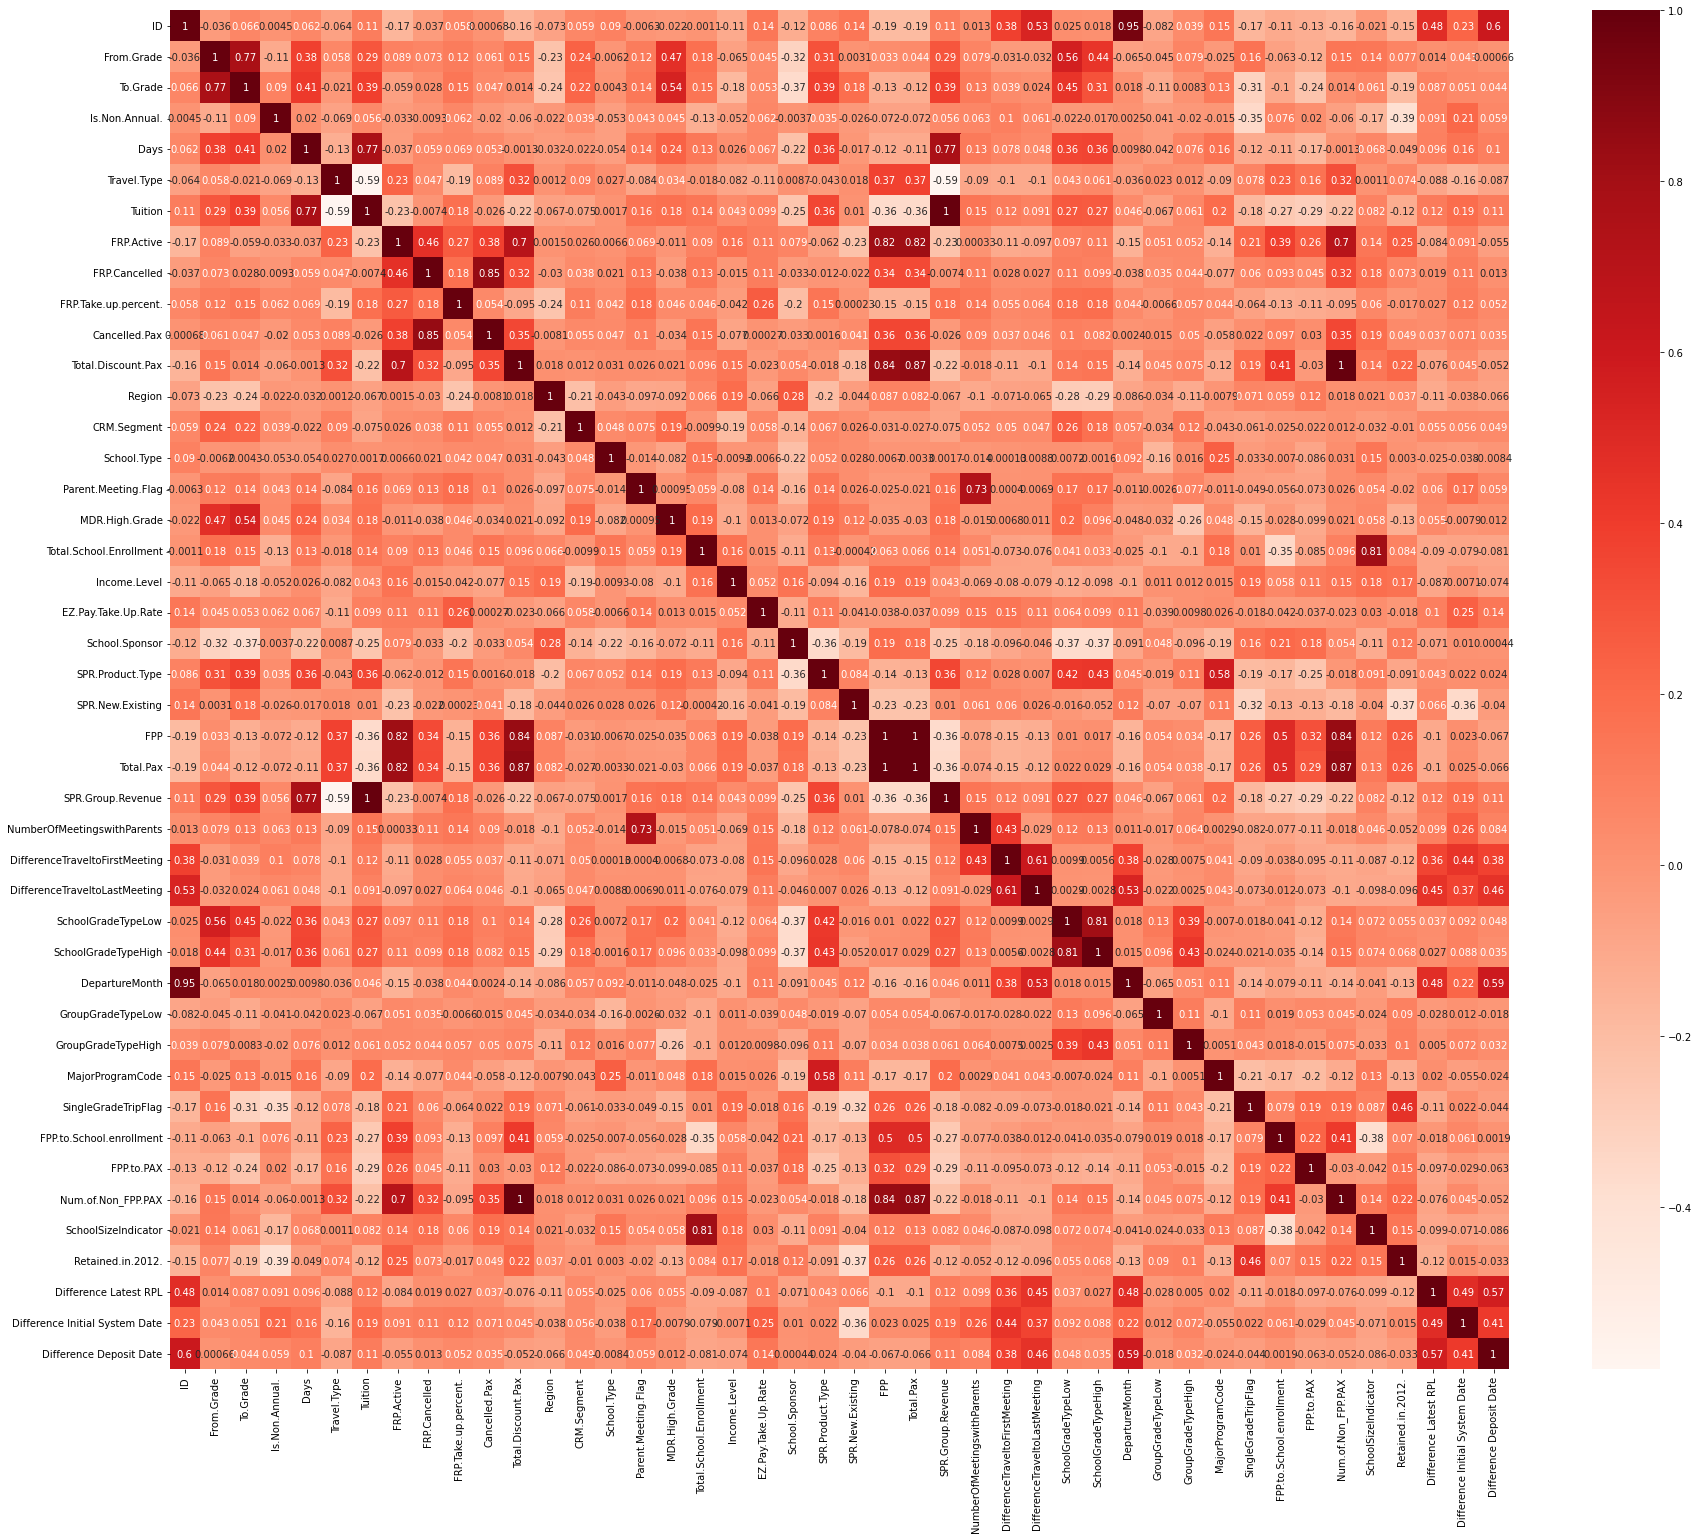

In [ ]:
#Heat-Map to find the data correlation.
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)

In [ ]:
data.corr()

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,Region,CRM.Segment,School.Type,Parent.Meeting.Flag,MDR.High.Grade,Total.School.Enrollment,Income.Level,EZ.Pay.Take.Up.Rate,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,Difference Latest RPL,Difference Initial System Date,Difference Deposit Date
ID,1.000000,-0.035883,0.066375,0.004484,0.061590,-0.064292,0.106021,-0.166402,-0.037480,0.057740,0.000683,-0.158681,-0.072760,0.058578,0.089574,-0.006338,-0.022212,-0.001108,-0.106548,0.137619,-0.123450,0.086105,0.143954,-0.187488,-0.187344,0.106021,0.012682,0.379272,0.529766,0.025298,0.017995,0.948895,-0.081666,0.039309,0.146905,-0.166959,-0.108522,-0.126038,-0.158681,-0.020829,-0.148490,0.483752,0.229535,0.603347
From.Grade,-0.035883,1.000000,0.773636,-0.110848,0.379421,0.058237,0.290513,0.088542,0.072532,0.116067,0.061153,0.149032,-0.232114,0.237420,-0.006180,0.115376,0.467046,0.180300,-0.065237,0.045076,-0.316669,0.308118,0.003106,0.033145,0.044136,0.290513,0.079016,-0.031253,-0.032349,0.561730,0.443380,-0.065349,-0.045341,0.078963,-0.024638,0.156292,-0.063256,-0.119360,0.149032,0.137584,0.076981,0.013597,0.042690,0.000660
To.Grade,0.066375,0.773636,1.000000,0.089975,0.410927,-0.021375,0.388165,-0.059041,0.028277,0.146189,0.047310,0.013794,-0.243611,0.223037,0.004286,0.136725,0.543908,0.149834,-0.181424,0.052999,-0.365572,0.385024,0.180873,-0.133492,-0.121847,0.388165,0.129321,0.038663,0.024139,0.445969,0.310426,0.017615,-0.109161,0.008339,0.129546,-0.313084,-0.104249,-0.238214,0.013794,0.061349,-0.194107,0.086948,0.050666,0.043945
Is.Non.Annual.,0.004484,-0.110848,0.089975,1.000000,0.019720,-0.069058,0.056052,-0.033359,-0.009289,0.061712,-0.020190,-0.060039,-0.022166,0.039034,-0.053372,0.043010,0.044994,-0.132097,-0.052363,0.061965,-0.003663,0.035313,-0.025845,-0.072195,-0.072043,0.056052,0.063371,0.104632,0.060893,-0.022436,-0.016918,0.002494,-0.040784,-0.019561,-0.015095,-0.352164,0.075641,0.020026,-0.060039,-0.170910,-0.390633,0.091058,0.212748,0.059349
Days,0.061590,0.379421,0.410927,0.019720,1.000000,-0.126198,0.772086,-0.037300,0.058620,0.069282,0.052793,-0.001338,-0.031682,-0.021896,-0.054059,0.142625,0.238271,0.132684,0.025968,0.066963,-0.222797,0.361070,-0.016670,-0.116036,-0.107127,0.772086,0.127983,0.078327,0.048375,0.357831,0.362162,0.009810,-0.042471,0.076335,0.158590,-0.117656,-0.106090,-0.173382,-0.001338,0.068393,-0.049402,0.095862,0.158797,0.104473
Travel.Type,-0.064292,0.058237,-0.021375,-0.069058,-0.126198,1.000000,-0.589679,0.231072,0.046672,-0.192257,0.089031,0.320891,0.001171,0.089797,0.027464,-0.084318,0.034388,-0.018324,-0.082381,-0.111459,0.008730,-0.042756,0.018257,0.374809,0.374857,-0.589679,-0.089703,-0.104984,-0.102046,0.043240,0.061086,-0.036256,0.022531,0.011918,-0.090084,0.078243,0.234133,0.159178,0.320891,0.001083,0.074275,-0.088305,-0.159488,-0.086500
Tuition,0.106021,0.290513,0.388165,0.056052,0.772086,-0.589679,1.000000,-0.225533,-0.007369,0.175085,-0.026192,-0.218439,-0.067145,-0.075386,0.001710,0.157659,0.175851,0.144456,0.043004,0.098941,-0.246801,0.358444,0.010294,-0.364922,-0.356411,1.000000,0.153833,0.115361,0.091197,0.274626,0.271426,0.046123,-0.066725,0.060974,0.198895,-0.179277,-0.266718,-0.294471,-0.218439,0.081983,-0.119015,0.123434,0.191635,0.113786
FRP.Active,-0.166402,0.088542,-0.059041,-0.033359,-0.037300,0.231072,-0.225533,1.000000,0.463491,0.269307,0.383178,0.698390,0.001493,0.026412,0.006568,0.068607,-0.011058,0.089813,0.156391,0.108399,0.078897,-0.062418,-0.229213,0.815323,0.815460,-0.225533,0.000334,-0.110831,-0.097206,0.097048,0.109360,-0.147015,

From the correlation matrix we see that some features are highly correlated e.g FPP and Total PAX, Total discount PAX and No. of non FPP PAX.

Therefore we eliminate one of the similar columns. Also, with the help of correlation matrix we choose the features which most affect the target variable and that are: SingleGradeTripFlag,FPP, FRP.Active,Total.Discount.Pax, Is.Non.Annual., SPR New.Existing. Now we build a model using only these features.

Using the same procedure as done previously

In [ ]:
#Considering most co-related data and dropping other columns
X_new=new_data[['SingleGradeTripFlag','FRP.Active','Total.Discount.Pax','Is.Non.Annual.','SPR.New.Existing']]

In [ ]:
#Training-Testing Data with new columns
X_train_new,X_test_new,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=30)

In [ ]:
print("----Before Splitting----")
print('X:',X_new.shape)
print("----After Splitting----")
print('X_train:',X_train_new.shape)
print('X_test:',X_test_new.shape)

----Before Splitting----
X: (2389, 5)
----After Splitting----
X_train: (1672, 5)
X_test: (717, 5)


In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train_new,y_train)
predictions=model.predict(X_test_new)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7573221757322176


In [ ]:
model = LogisticRegression()
model.fit(X_train_new, y_train)
predictions = model.predict(X_test_new)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.803347280334728


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_new, y_train)
predictions = model.predict(X_test_new)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7252440725244073


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_new, y_train)
predictions = model.predict(X_test_new)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7601115760111576


In [ ]:
model = svm.SVC()
model.fit(X_train_new,y_train)
predictions = model.predict(X_test_new)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7531380753138075


In [ ]:
model = LogisticRegression()
model.fit(X_train_new, y_train)
predictions = model.predict(X_test_new)
print("Best model accuracy:",accuracy_score(y_test,predictions))

Best model accuracy: 0.803347280334728


Generating a Confusion Matrix to determine how accurate our model has predicted using the actual data set.


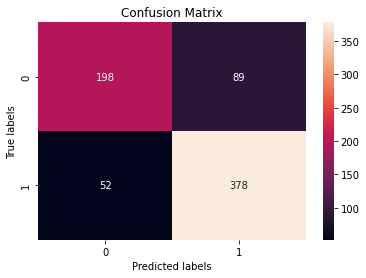

In [ ]:
cm=confusion_matrix(y_test,predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

# Part B

ID                   0
NPS 2011           577
NPS 2010          1229
NPS 2009          1225
NPS 2008          1412
>= 3 FPP Date        9
>= 10 FPP Date     409
>= 20 FPP Date    1024
>= 35 FPP Date    1618
dtype: int64


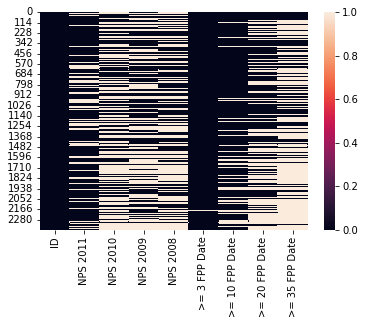

In [ ]:
partb_data=pd.read_csv("65B.csv",parse_dates=['>= 3 FPP Date','>= 10 FPP Date','>= 20 FPP Date','>= 35 FPP Date'])
print(partb_data.isnull().sum())
sns.heatmap(partb_data.isnull())

In [ ]:
#Filling NA Values.
combined_data=pd.merge(new_data, partb_data, on='ID', how='outer')
combined_data=pd.merge(combined_data,departure_dates,on='ID',how='outer')
combined_data.drop(['>= 10 FPP Date','>= 20 FPP Date','>= 35 FPP Date','NPS 2009', 'NPS 2010', 'NPS 2008'],axis=1,inplace=True)
combined_data = combined_data[combined_data['NPS 2011'].notna()]
combined_data['Difference >3 FPP Date'] = (combined_data['Departure.Date']-combined_data['>= 3 FPP Date'])/np.timedelta64(1, 'D')
combined_data['Difference >3 FPP Date'].fillna(int(combined_data['Difference >3 FPP Date'].mean()),inplace=True)
combined_data.drop(['Departure.Date','>= 3 FPP Date'],axis=1,inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1812 entries, 0 to 2388
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1812 non-null   int64  
 1   From.Grade                      1812 non-null   float64
 2   To.Grade                        1812 non-null   float64
 3   Is.Non.Annual.                  1812 non-null   int64  
 4   Days                            1812 non-null   int64  
 5   Travel.Type                     1812 non-null   int64  
 6   Tuition                         1812 non-null   int64  
 7   FRP.Active                      1812 non-null   int64  
 8   FRP.Cancelled                   1812 non-null   int64  
 9   FRP.Take.up.percent.            1812 non-null   float64
 10  Cancelled.Pax                   1812 non-null   int64  
 11  Total.Discount.Pax              1812 non-null   int64  
 12  Region                          18

In [ ]:
#Splitting the data
y_b=combined_data['Retained.in.2012.']
X_b=combined_data.drop(['ID','Retained.in.2012.'],axis=1)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_b,y_b,test_size=0.3,random_state=30)

In [ ]:
print("----Before Splitting----")
print('X:',X_b.shape)
print("----After Splitting----")
print('X_train:',X_train_b.shape)
print('X_test:',X_test_b.shape)

----Before Splitting----
X: (1812, 44)
----After Splitting----
X_train: (1268, 44)
X_test: (544, 44)


In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train_b,y_train_b)
predictions=model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.7426470588235294


In [ ]:
model = LogisticRegression()
model.fit(X_train_b, y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6911764705882353


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scaler=MinMaxScaler()
X_train_b_normalized=scaler.fit_transform(X_train_b)
X_test_b_normalized=scaler.fit_transform(X_test_b)

In [ ]:
model = LogisticRegression()
model.fit(X_train_b_normalized, y_train_b)
predictions = model.predict(X_test_b_normalized)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.8216911764705882


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_b, y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6323529411764706


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_b, y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.8051470588235294


In [ ]:
model = svm.SVC()
model.fit(X_train_b,y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6139705882352942


In [ ]:
best_model = LogisticRegression()
best_model.fit(X_train_b_normalized, y_train_b)
best_predictions = best_model.predict(X_test_b_normalized)
print("Best Accuracy:",accuracy_score(y_test_b,best_predictions))

Best Accuracy: 0.8216911764705882


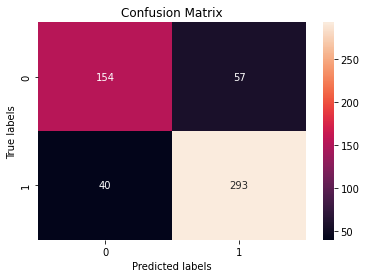

In [ ]:
cm=confusion_matrix(y_test_b,best_predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## **Part  B-2. Fill NA Values with Median**




In [ ]:
combined_data=pd.merge(new_data, partb_data, on='ID', how='outer')
combined_data=pd.merge(combined_data,departure_dates,on='ID',how='outer')

In [ ]:
combined_data.drop(['>= 10 FPP Date','>= 20 FPP Date','>= 35 FPP Date','NPS 2009', 'NPS 2010', 'NPS 2008'],axis=1,inplace=True)

In [ ]:
combined_data['Difference >3 FPP Date'] = (combined_data['Departure.Date']-combined_data['>= 3 FPP Date'])/np.timedelta64(1, 'D')
combined_data['Difference >3 FPP Date'].fillna(int(combined_data['Difference >3 FPP Date'].mean()),inplace=True)
combined_data.drop(['Departure.Date','>= 3 FPP Date'],axis=1,inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 0 to 2388
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   int64  
 1   From.Grade                      2389 non-null   float64
 2   To.Grade                        2389 non-null   float64
 3   Is.Non.Annual.                  2389 non-null   int64  
 4   Days                            2389 non-null   int64  
 5   Travel.Type                     2389 non-null   int64  
 6   Tuition                         2389 non-null   int64  
 7   FRP.Active                      2389 non-null   int64  
 8   FRP.Cancelled                   2389 non-null   int64  
 9   FRP.Take.up.percent.            2389 non-null   float64
 10  Cancelled.Pax                   2389 non-null   int64  
 11  Total.Discount.Pax              2389 non-null   int64  
 12  Region                          23

In [ ]:
combined_data['NPS 2011'].fillna(int(combined_data['NPS 2011'].median()),inplace=True)

In [ ]:
y_b=combined_data['Retained.in.2012.']
X_b=combined_data.drop(['ID','Retained.in.2012.'],axis=1)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_b,y_b,test_size=0.3,random_state=30)

In [ ]:
print("----Before Splitting----")
print('X:',X_b.shape)
print("----After Splitting----")
print('X_train:',X_train_b.shape)
print('X_test:',X_test_b.shape)

----Before Splitting----
X: (2389, 44)
----After Splitting----
X_train: (1672, 44)
X_test: (717, 44)


In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train_b,y_train_b)
predictions=model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6792189679218968


In [ ]:
model = LogisticRegression()
model.fit(X_train_b, y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6638772663877266


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
scaler=MinMaxScaler()
X_train_b_normalized=scaler.fit_transform(X_train_b)
X_test_b_normalized=scaler.fit_transform(X_test_b)

In [ ]:
model = LogisticRegression()
model.fit(X_train_b_normalized, y_train_b)
predictions = model.predict(X_test_b_normalized)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.793584379358438


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_b, y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6150627615062761


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_b, y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.8047419804741981


In [ ]:
model = svm.SVC()
model.fit(X_train_b,y_train_b)
predictions = model.predict(X_test_b)
print("Accuracy:",accuracy_score(y_test_b,predictions))

Accuracy: 0.6052998605299861


##[ **Feature importance using Logistic Regression**](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

~ Reference : "How to Calculate Feature Importance With Python" by Jason Brownlee

Feature: 0, Score: 0.34530
Feature: 1, Score: -0.51075
Feature: 2, Score: -2.02492
Feature: 3, Score: -0.20109
Feature: 4, Score: -0.21521
Feature: 5, Score: -0.39574
Feature: 6, Score: 0.88568
Feature: 7, Score: -0.15321
Feature: 8, Score: 0.16932
Feature: 9, Score: 0.21233
Feature: 10, Score: 0.63234
Feature: 11, Score: -0.15037
Feature: 12, Score: 0.20041
Feature: 13, Score: 0.38361
Feature: 14, Score: -0.08666
Feature: 15, Score: -0.42152
Feature: 16, Score: 0.23939
Feature: 17, Score: 0.61313
Feature: 18, Score: 0.07658
Feature: 19, Score: 0.84962
Feature: 20, Score: 0.03714
Feature: 21, Score: -1.23498
Feature: 22, Score: 0.54546
Feature: 23, Score: 0.56752
Feature: 24, Score: -0.39574
Feature: 25, Score: 0.15814
Feature: 26, Score: -0.28444
Feature: 27, Score: 0.33138
Feature: 28, Score: 0.23575
Feature: 29, Score: 0.75031
Feature: 30, Score: -0.81541
Feature: 31, Score: 0.27244
Feature: 32, Score: 0.23207
Feature: 33, Score: -0.34743
Feature: 34, Score: 0.92451
Feature: 35, Sco

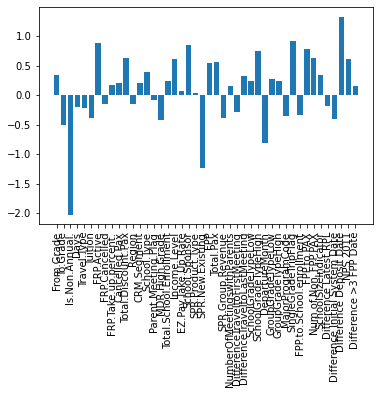

In [ ]:
importance = best_model.coef_[0]
columns=X_train_b.columns
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(columns, importance)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()